# 準備

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

FILE_SAVE = True
DEFAULT_COLOR = '#1f77b4'

In [2]:
train = pd.read_csv('./data/train.tsv', sep='\t')
test = pd.read_csv('./data/test.tsv', sep='\t')

## 実行条件

In [3]:
# 可視化結果を保存するかどうか
FILE_SAVE_FLAG = False

## 可視化関数

### df_plot_frec

In [4]:
# 頻度（ヒストグラム＆箱ひげ図）
def df_plot_frec(df, cols=None):
    i = 1
    if cols==None:
        cols = df.columns
    
    for col in cols:
        if(df[col].dtype!=np.object):
            fig = plt.figure(figsize=(14,3))
            ax1 = fig.add_subplot(121)
            ax1.set_title(str(i)+ ' : ' +str(col) + ' histgram')
            ax2 = fig.add_subplot(122)
            ax2.set_title(str(i)+ ' : ' +str(col) + ' box plot')
            
            if df[col].nunique() > 20:
                ax1.hist(df[col], bins=20)
                ax2.boxplot(df[col])
            else:
                ax1.hist(df[col])
                ax2.boxplot(df[col])
        i+=1

### df_plot_frec_bar

In [5]:
# 頻度棒グラフ（ランキング対応可）
def df_plot_frec_bar(df, cols=None, val_rank=False, sort_index=False):
    i = 1
    if cols==None:
        cols = df.columns
    
    for col in cols:
        if(df[col].dtype!=np.object):
            
            if df[col].nunique()>40:
                figsz = (20, 3)
            else:
                figsz = (7, 3)
            fig = plt.figure(figsize=figsz)
            ax = fig.add_subplot(111)
            ax.set_title(str(i)+ ' : ' +str(col))
            
            if val_rank == True:
                df[col].value_counts().plot(kind='bar', color=DEFAULT_COLOR)
            elif sort_index == True:
                df[col].value_counts().sort_index().plot(kind='bar', color=DEFAULT_COLOR)
            else:
                df[col].value_counts(sort=False).plot(kind='bar', color=DEFAULT_COLOR)
           
        i+=1

### df_plot_bar

In [6]:
# 棒グラフ（ランキング対応可）
def df_plot_bar(df, cols=None, val_rank=False, sort_index=False):
    i = 1
    figsz = (30, 7)
    if cols==None:
        cols = df.columns
    
    for col in cols:
        if(df[col].dtype!=np.object):

            fig = plt.figure(figsize=figsz)
            ax = fig.add_subplot(111)
            ax.set_title(str(i)+ ' : ' +str(col))
            
            if val_rank == True:
                df[col].sort_values(ascending=False).plot(kind='bar', color=DEFAULT_COLOR)
            else:
                df[col].plot(kind='bar', color=DEFAULT_COLOR)
                
        i+=1

### df_plot_time

In [7]:
# 折れ線グラフ（時系列）
def df_plot_time(df, timer=None, cols=None):
    i = 1
    figsz = (10, 4)
    if cols==None:
        cols = df.columns
    
    for col in cols:
        if(df[col].dtype!=np.object):

            fig = plt.figure(figsize=figsz)
            ax = fig.add_subplot(111)
            ax.set_title(str(i)+ ' : ' +str(col))
            
            if timer == None:
                ax.plot(df.index, df[col])
            else:
                ax.plot(df[timer], df[col])
            
        i+=1

---

# データ確認

## train

In [8]:
# データサイズ
train.shape

(199, 10)

In [9]:
# データサンプル
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [10]:
# 基本統計量
train.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


In [11]:
# 型
train.dtypes

id                int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
# ユニーク数
train.nunique()

id              199
mpg              91
cylinders         5
displacement     63
horsepower       71
weight          184
acceleration     71
model year       13
origin            3
car name        167
dtype: int64

In [13]:
# NA数
train.isna().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
# カラム
default_feature_train = train.columns
default_feature_train

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [15]:
# 車種列挙
train['car name'].unique()

array(['dodge aries se', 'vw rabbit custom', 'toyota mark ii',
       'dodge colt', 'toyota tercel', 'pontiac phoenix',
       'chevroelt chevelle malibu', 'oldsmobile omega', 'bmw 2002',
       'dodge st. regis', 'mercedes-benz 280s', 'dodge omni',
       'datsun pl510', 'chevrolet impala', 'amc hornet',
       'renault 12 (sw)', 'chevrolet chevette', 'chevrolet woody',
       'peugeot 505s turbo diesel', 'datsun 280-zx', 'ford pinto',
       'mercury cougar brougham', 'subaru', 'chevrolet caprice classic',
       'amc concord dl', 'mercury zephyr 6', 'pontiac safari (sw)',
       'dodge charger 2.2', 'chevrolet chevelle malibu',
       'oldsmobile cutlass ciera (diesel)', 'honda accord cvcc',
       'chevrolet chevelle malibu classic', 'volkswagen scirocco',
       'toyota starlet', 'saab 99le', 'toyota corolla 1200',
       'amc matador', 'subaru dl', 'mazda 626', 'pontiac astro',
       'volkswagen rabbit custom diesel', 'plymouth reliant',
       'ford granada l', 'ford pinto (sw)

### 数量

In [16]:
# index 通り
# df_plot_bar(train)

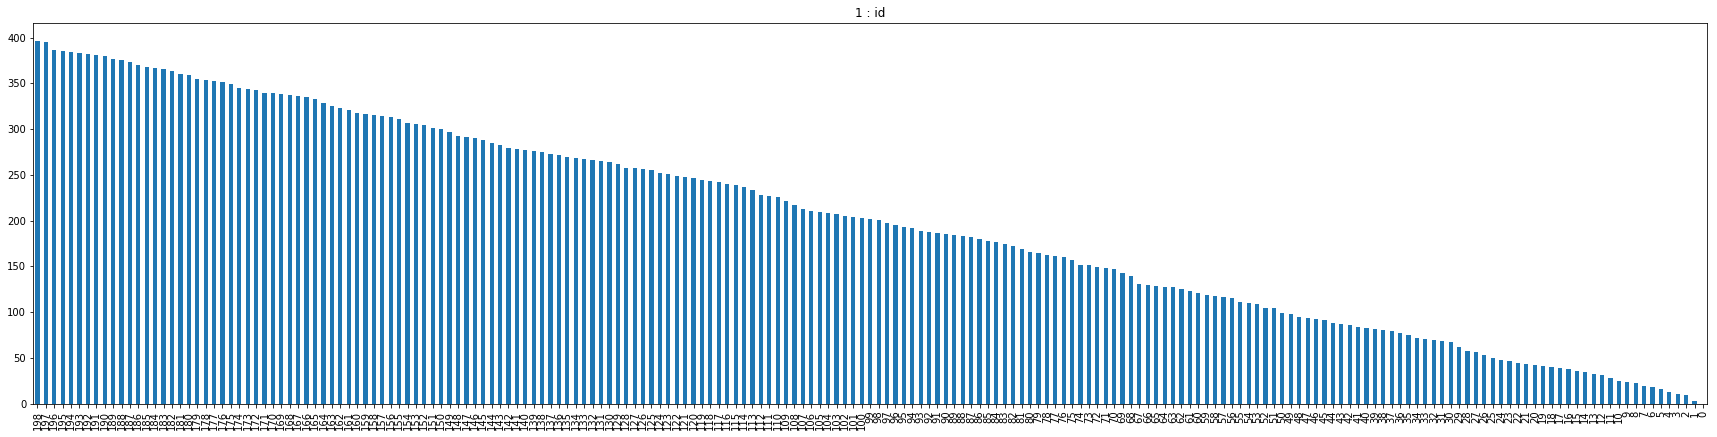

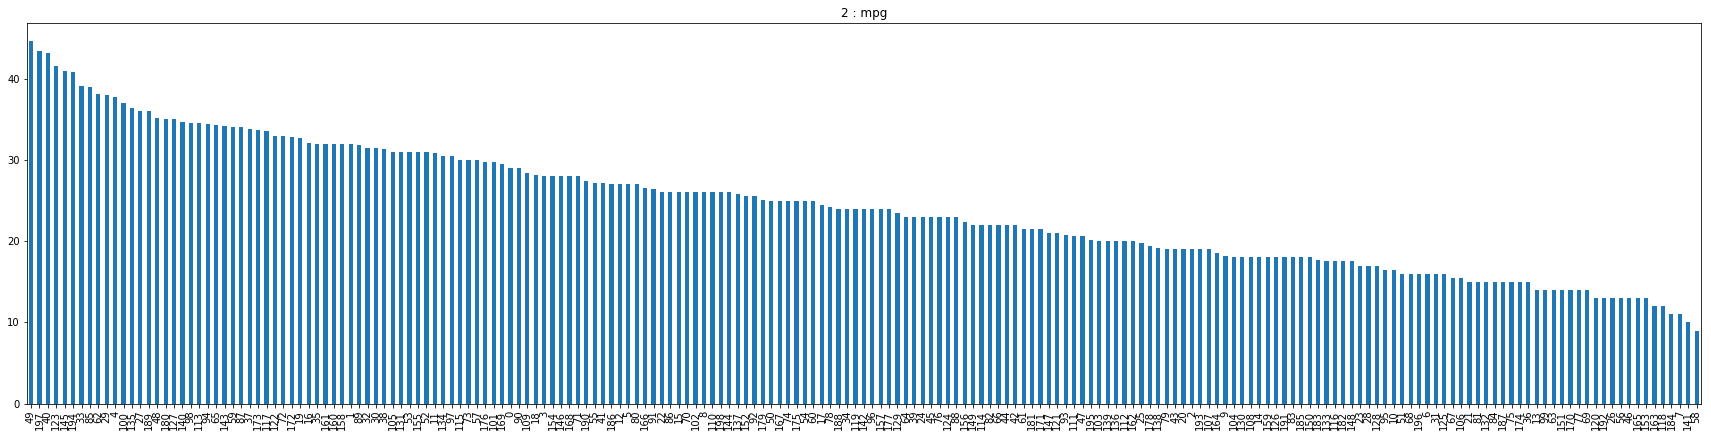

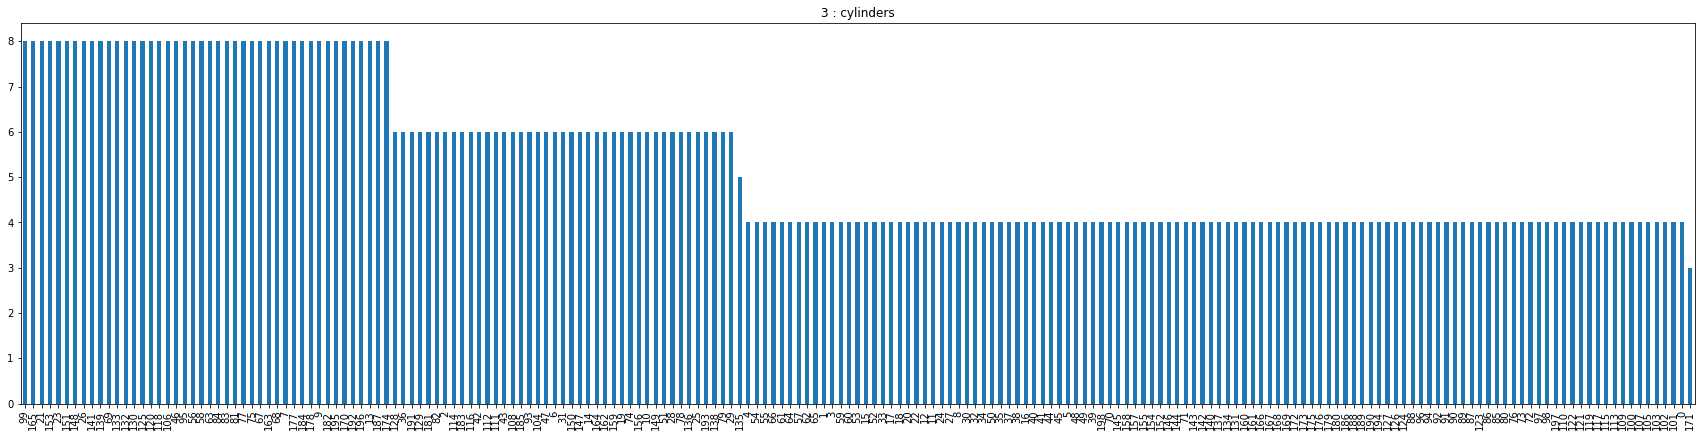

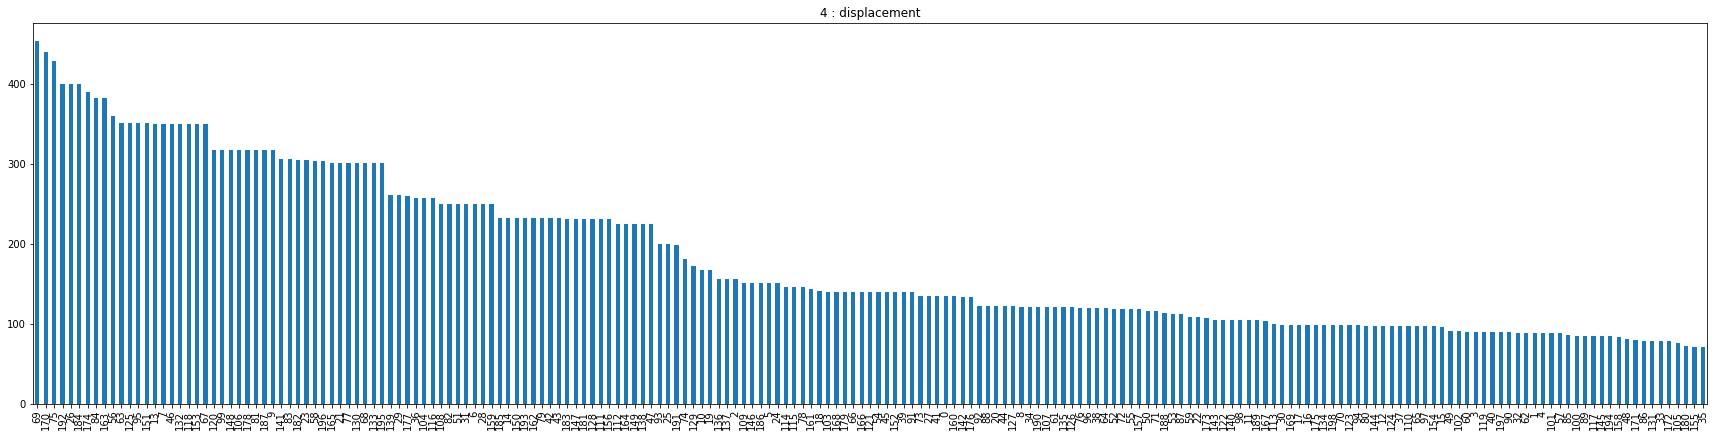

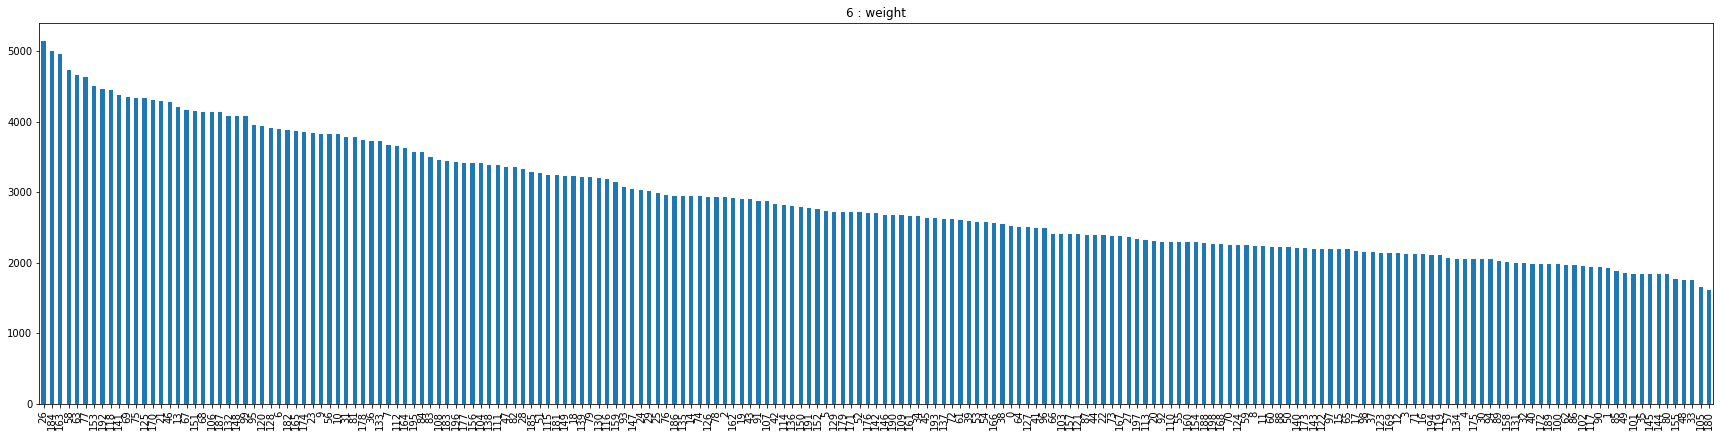

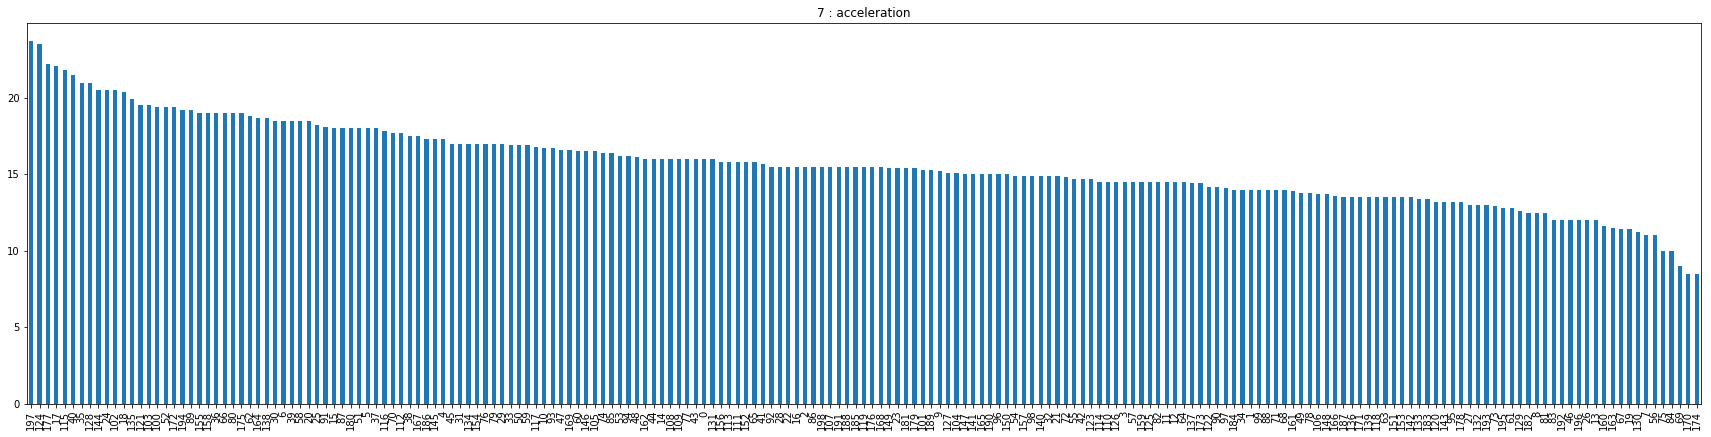

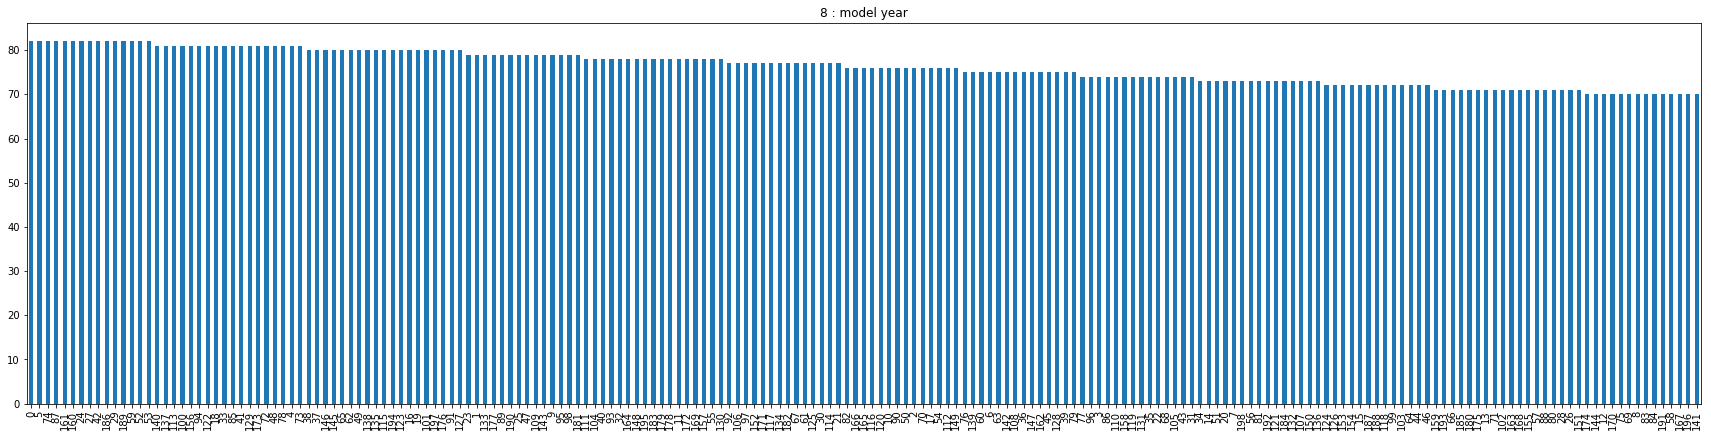

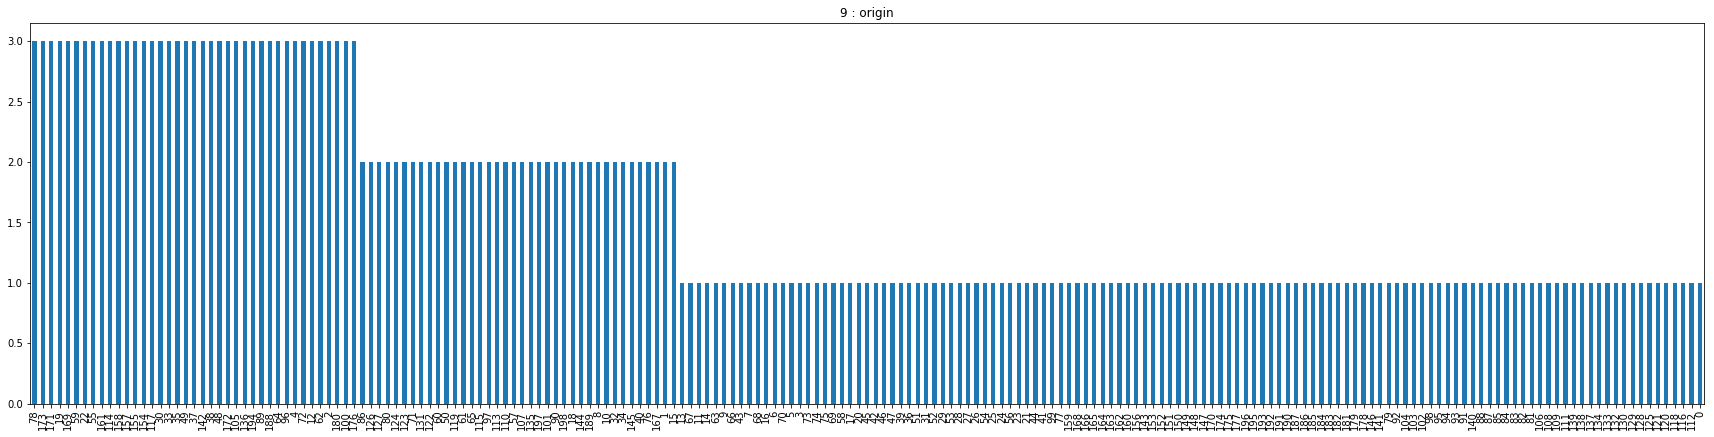

In [17]:
# ランキング
df_plot_bar(train, val_rank=True)

### 頻度

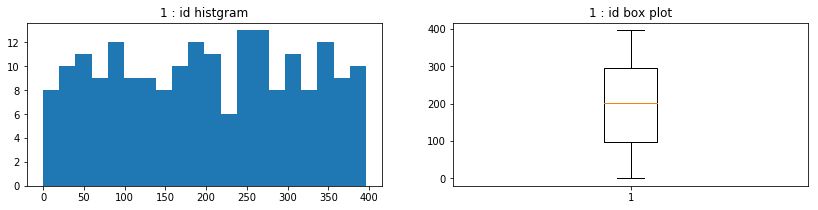

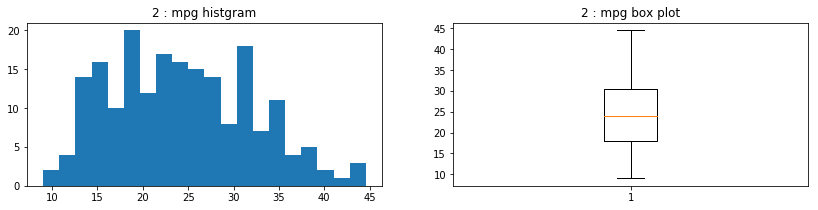

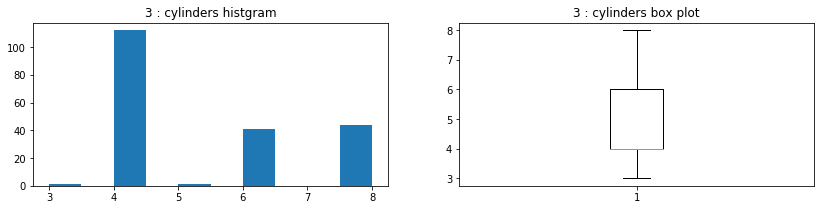

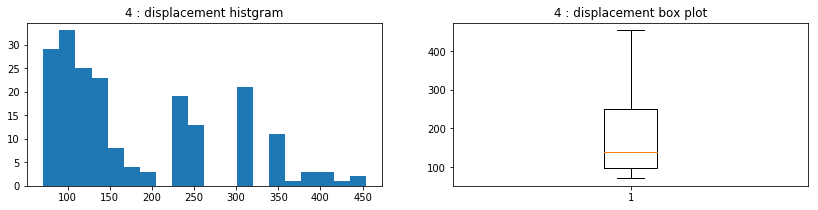

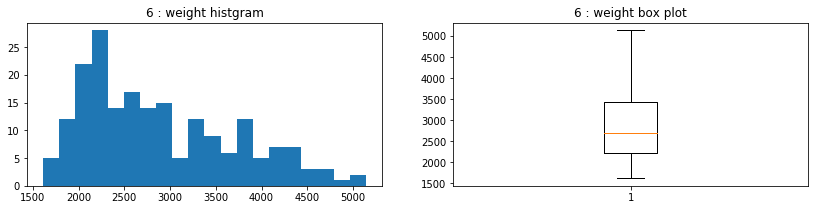

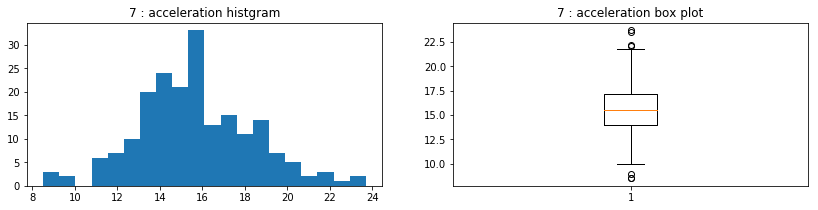

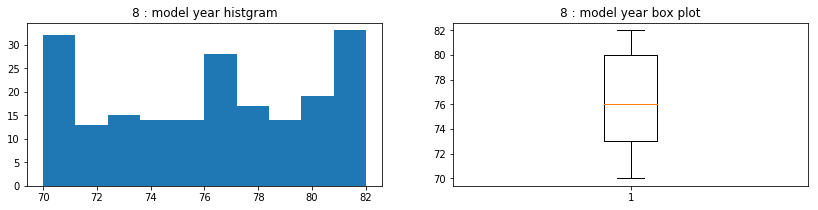

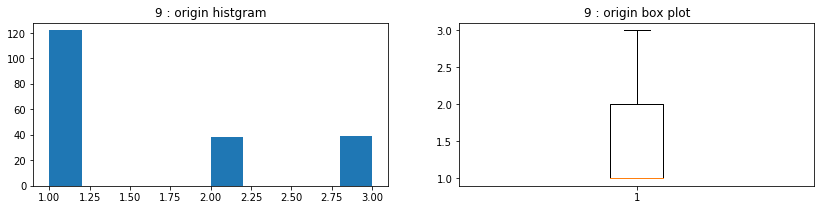

In [18]:
# ヒストグラム&箱ひげ図
df_plot_frec(train)

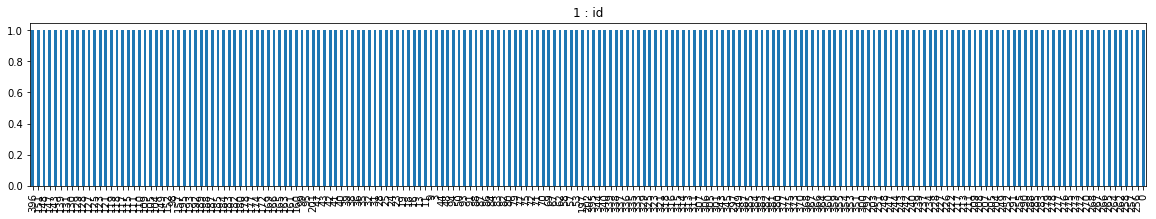

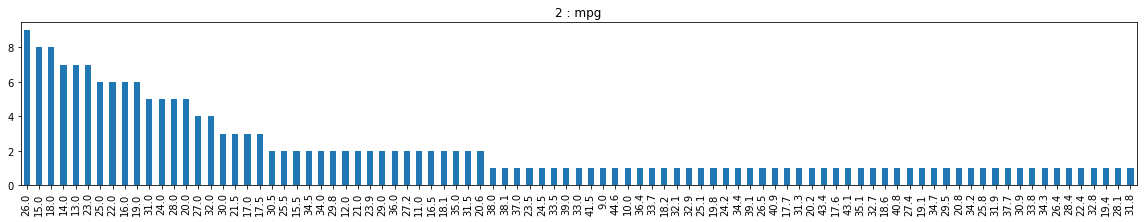

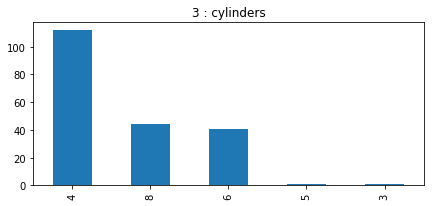

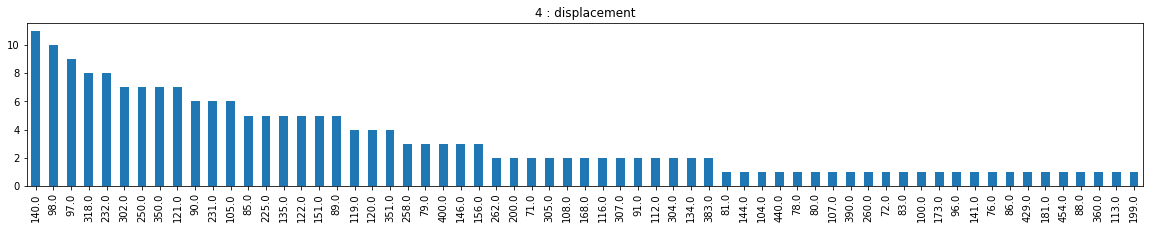

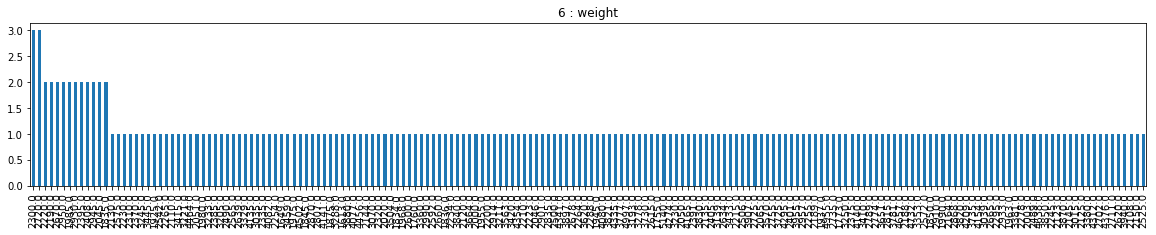

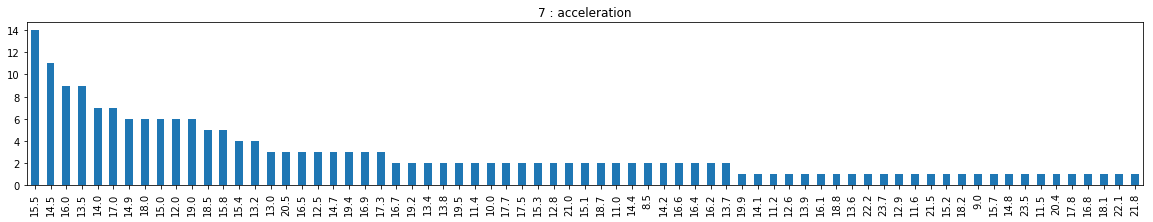

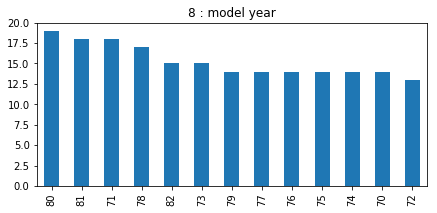

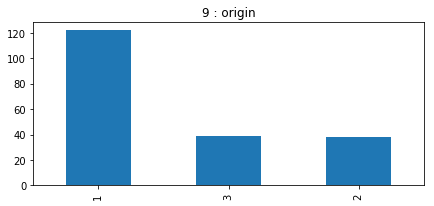

In [19]:
# 頻度ランキング
df_plot_frec_bar(train, val_rank=True)

In [20]:
# 値昇順にしたときの頻度の並び
#df_plot_frec_bar(train, sort_index=True)

### 相関

In [21]:
train.corr()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
id,1.000000,-0.052688,0.103419,0.098416,0.070563,-0.087649,-0.093272,-0.031421
mpg,-0.052688,1.000000,-0.770160,-0.804635,-0.820660,0.379721,0.568471,0.533671
cylinders,0.103419,-0.770160,1.000000,0.950600,0.893256,-0.479561,-0.303462,-0.497373
displacement,0.098416,-0.804635,0.950600,1.000000,0.933038,-0.523955,-0.329817,-0.579805
weight,0.070563,-0.820660,0.893256,0.933038,1.000000,-0.401757,-0.265562,-0.535893
acceleration,-0.087649,0.379721,-0.479561,-0.523955,-0.401757,1.000000,0.194854,0.189193
model year,-0.093272,0.568471,-0.303462,-0.329817,-0.265562,0.194854,1.000000,0.124279
origin,-0.031421,0.533671,-0.497373,-0.579805,-0.535893,0.189193,0.124279,1.000000


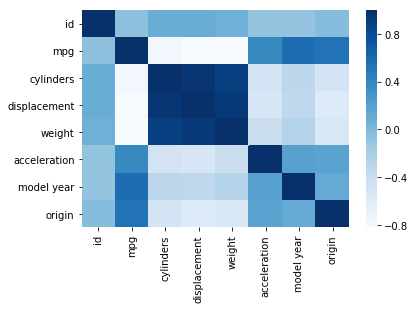

In [22]:
sns.heatmap(train.corr(), cmap='Blues')

In [23]:
# mpg の相関係数列挙
train.corr().mpg.abs().sort_values(ascending=False)

mpg             1.000000
weight          0.820660
displacement    0.804635
cylinders       0.770160
model year      0.568471
origin          0.533671
acceleration    0.379721
id              0.052688
Name: mpg, dtype: float64

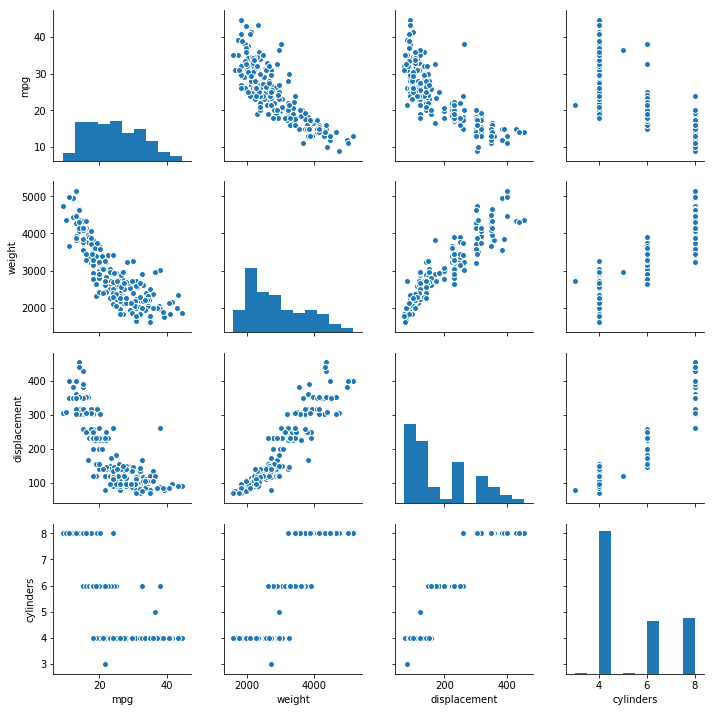

In [24]:
sns.pairplot(train.loc[:, ["mpg", "weight", "displacement", "horsepower", "cylinders"]])

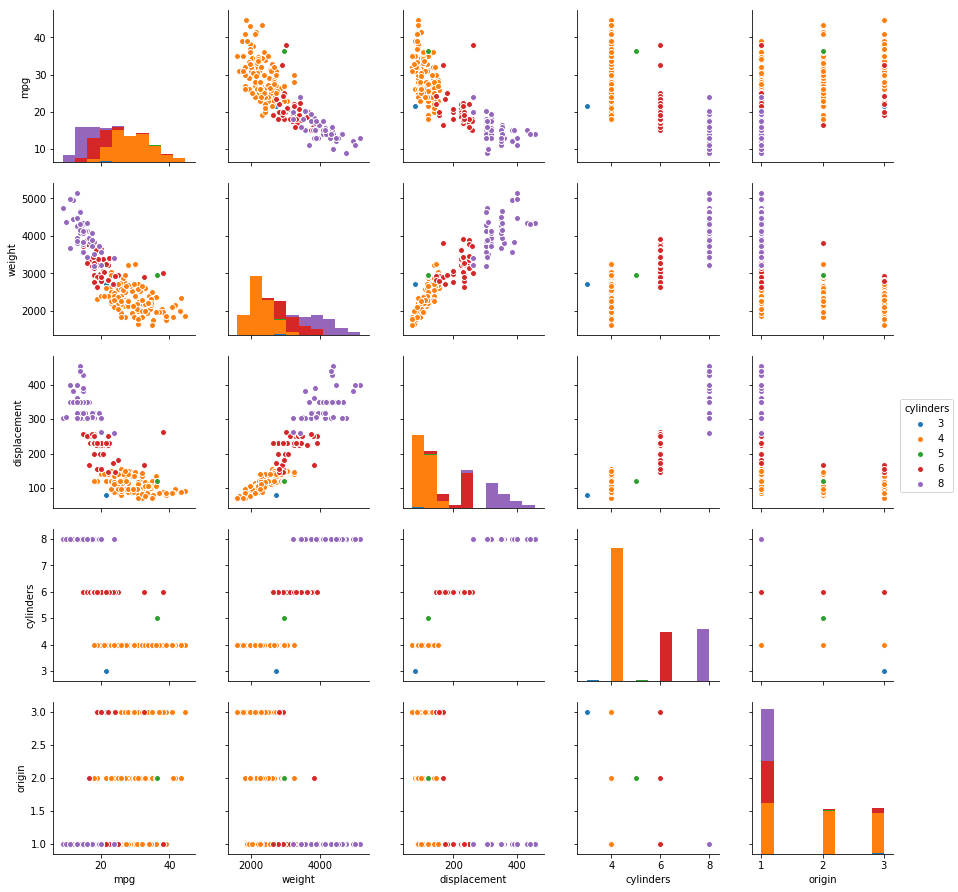

In [25]:
sns.pairplot(train.loc[:, ["mpg", "weight", "displacement", "horsepower", "cylinders", "origin"]], hue="cylinders")

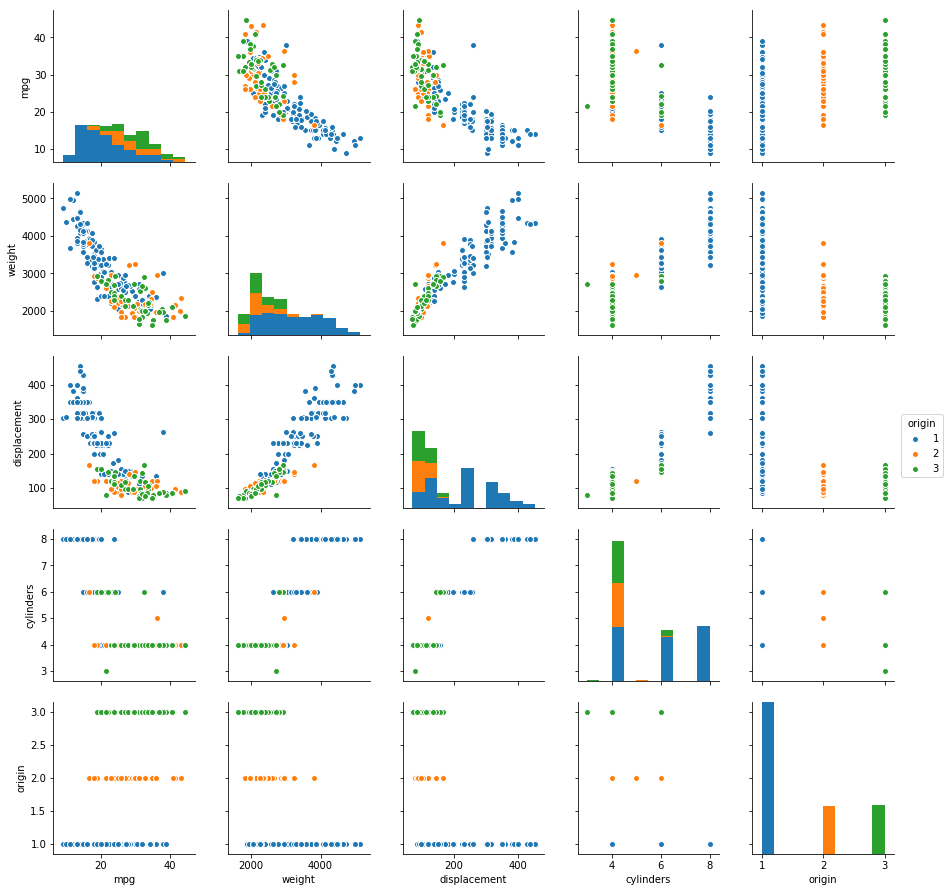

In [26]:
sns.pairplot(train.loc[:, ["mpg", "weight", "displacement", "horsepower", "cylinders", "origin"]], hue="origin")

#### 気になったデータ

In [27]:
# 馬力＝?
train.loc[train.loc[:, 'horsepower']=="?", :]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
24,48,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl
113,234,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
145,288,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
175,349,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto


In [28]:
# シリンダー=3 は1件しかない
train.loc[train.loc[:, "cylinders"]==3, :].sort_values("mpg", ascending=False).head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
171,340,21.5,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4


In [29]:
# シリンダー=5 も1件しかない
train.loc[train.loc[:, "cylinders"]==5, :].sort_values("mpg", ascending=False).head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
135,270,36.4,5,121.0,67.00,2950.0,19.9,80,2,audi 5000s (diesel)


In [30]:
# シリンダー=6 で突出してmpgが高い行が2件ある
train.loc[train.loc[:, "cylinders"]==6, :].sort_values("mpg", ascending=False).head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
29,62,38.0,6,262.0,85.00,3015.0,17.0,82,1,oldsmobile cutlass ciera (diesel)
19,41,32.7,6,168.0,132.0,2910.0,11.4,80,3,datsun 280-zx
74,152,25.0,6,181.0,110.0,2945.0,16.4,82,1,buick century limited
78,163,24.2,6,146.0,120.0,2930.0,13.8,81,3,datsun 810 maxima
129,262,23.5,6,173.0,110.0,2725.0,12.6,81,1,chevrolet citation


### グルーピング検討

In [31]:
# モデル年は時系列でデータ確認するのに使えそう

In [32]:
# 同車種名で起源が分かれているかどうか確認した。分かれていなかったからグルーピングは難しいと考える。
train[train.loc[:, "car name"].str.contains("corona")]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
64,128,23.0,4,120.0,97.00,2506.0,14.5,72,3,toyouta corona mark ii (sw)
105,209,31.0,4,76.0,52.00,1649.0,16.5,74,3,toyota corona
142,279,24.0,4,134.0,96.00,2702.0,13.5,75,3,toyota corona
176,351,29.8,4,134.0,90.00,2711.0,15.5,80,3,toyota corona liftback
188,375,24.0,4,113.0,95.00,2278.0,15.5,72,3,toyota corona hardtop


## test

In [33]:
# データサイズ
test.shape

(199, 9)

In [34]:
# データサンプル
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


In [35]:
# 基本統計量
test.describe()

,id,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,196.829146,5.613065,203.540201,3057.010050,15.488442,75.854271,1.562814
std,116.881279,1.745421,109.137648,866.496615,2.816943,3.592060,0.807055
min,1.000000,3.000000,68.000000,1795.000000,8.000000,70.000000,1.000000
25%,100.500000,4.000000,107.000000,2255.500000,13.500000,73.000000,1.000000
50%,196.000000,6.000000,163.000000,2945.000000,15.500000,76.000000,1.000000
75%,298.500000,8.000000,304.000000,3672.000000,17.150000,79.000000,2.000000
max,397.000000,8.000000,455.000000,4952.000000,24.800000,82.000000,3.000000


In [36]:
# 型
test.dtypes

id                int64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [37]:
# ユニーク数
test.nunique()

id              199
cylinders         5
displacement     62
horsepower       73
weight          183
acceleration     70
model year       13
origin            3
car name        169
dtype: int64

In [38]:
# NA数
test.isna().sum()

id              0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [39]:
# カラム
default_feature_test = test.columns
default_feature_test

Index(['id', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

----

# 前処理 ＆ データ保存

## 必要最低限の処理

In [40]:
# 異常行削除
train = train.loc[train.loc[:, 'horsepower']!="?", :]
train.horsepower = train.horsepower.astype("float64")

In [41]:
# 保管
if FILE_SAVE:
    train.to_csv("./data/train_processed_00.csv")

## 精度向上のための処理1

In [42]:
# レアケース行削除
train = train.loc[train.loc[:, "cylinders"]!=3, :]
train = train.loc[train.loc[:, "cylinders"]!=5, :]
train = train.loc[~((train.loc[:, "cylinders"]==6) & (train.loc[:, "mpg"]>32)), :]

In [43]:
# 保管
if FILE_SAVE:
    train.to_csv("./data/train_processed_01.csv")

## 精度向上のための処理2

In [44]:
train2 = train.drop(columns=["acceleration", "origin"])

In [45]:
# 保管
if FILE_SAVE:
    train2.to_csv("./data/train_processed_02.csv")

## 標準化

In [46]:
# スキップ

## 時系列データ（model yaer)

In [47]:
# 時系列データ化
train_t = train.copy()
train_t['model year'] = pd.to_datetime("19" + train['model year'].astype('str'), format="%Y")
# モデル年ごとにグルーピング
#grouped = 
grouped = train_t.drop(columns=["id", "origin"]).groupby(pd.Grouper(key='model year', freq='Y')).mean()
grouped

,mpg,cylinders,displacement,horsepower,weight,acceleration
model year,,,,,,
1970-12-31,17.714286,6.714286,281.142857,150.357143,3415.214286,13.142857
1971-12-31,22.058824,5.411765,199.117647,102.294118,2888.411765,15.352941
1972-12-31,19.307692,5.538462,199.384615,113.461538,3130.384615,15.769231
1973-12-31,17.266667,6.133333,243.333333,122.733333,3275.200000,14.600000
1974-12-31,24.642857,4.857143,141.357143,86.428571,2594.642857,16.142857
1975-12-31,19.857143,5.571429,208.642857,100.285714,3224.857143,16.571429
1976-12-31,21.357143,5.428571,184.571429,97.285714,2978.785714,16.085714
1977-12-31,23.076923,5.692308,194.846154,108.461538,3039.692308,14.769231
1978-12-31,24.411765,5.529412,189.588235,102.294118,2897.941176,15.441176


----

# 前処理後データ確認

## train

In [48]:
# データサイズ
train.shape

(191, 10)

In [49]:
# データサンプル
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel


In [50]:
# 基本統計量
train.describe()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,200.010471,24.005759,5.329843,185.413613,101.356021,2895.565445,15.599476,76.041885,1.570681
std,112.965761,7.687414,1.657868,99.218269,35.753969,829.842518,2.680230,3.768055,0.797350
min,0.000000,9.000000,4.000000,71.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,101.500000,18.000000,4.000000,101.000000,75.000000,2217.500000,14.000000,73.000000,1.000000
50%,201.000000,23.900000,4.000000,140.000000,92.000000,2678.000000,15.500000,76.000000,1.000000
75%,294.500000,30.000000,6.000000,250.000000,114.000000,3452.000000,17.000000,79.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,220.000000,5140.000000,23.700000,82.000000,3.000000


In [51]:
# 型
train.dtypes

id                int64
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [52]:
# ユニーク数
train.nunique()

id              191
mpg              87
cylinders         3
displacement     61
horsepower       69
weight          179
acceleration     70
model year       13
origin            3
car name        160
dtype: int64

In [53]:
# NA数
train.isna().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [54]:
# カラム
default_feature_train = train.columns
default_feature_train

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [55]:
# 車種列挙
train['car name'].unique()

array(['dodge aries se', 'vw rabbit custom', 'toyota mark ii',
       'dodge colt', 'toyota tercel', 'pontiac phoenix',
       'chevroelt chevelle malibu', 'oldsmobile omega', 'bmw 2002',
       'dodge st. regis', 'mercedes-benz 280s', 'dodge omni',
       'datsun pl510', 'chevrolet impala', 'amc hornet',
       'renault 12 (sw)', 'chevrolet chevette', 'chevrolet woody',
       'peugeot 505s turbo diesel', 'ford pinto',
       'mercury cougar brougham', 'subaru', 'chevrolet caprice classic',
       'mercury zephyr 6', 'pontiac safari (sw)', 'dodge charger 2.2',
       'chevrolet chevelle malibu', 'honda accord cvcc',
       'chevrolet chevelle malibu classic', 'volkswagen scirocco',
       'toyota starlet', 'saab 99le', 'toyota corolla 1200',
       'amc matador', 'subaru dl', 'mazda 626', 'pontiac astro',
       'volkswagen rabbit custom diesel', 'plymouth reliant',
       'ford granada l', 'ford pinto (sw)', 'dodge aspen 6',
       'honda civic 1300', 'honda civic 1500 gl', 'opel 190

### 数量

In [56]:
# index 通り
# df_plot_bar(train)

In [57]:
# ランキング
# df_plot_bar(train, val_rank=True)

### 頻度

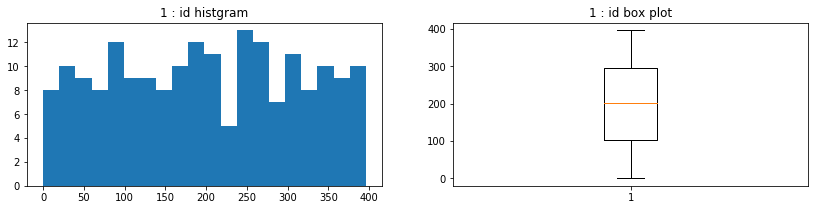

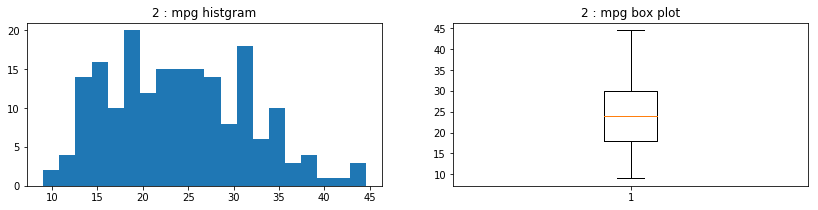

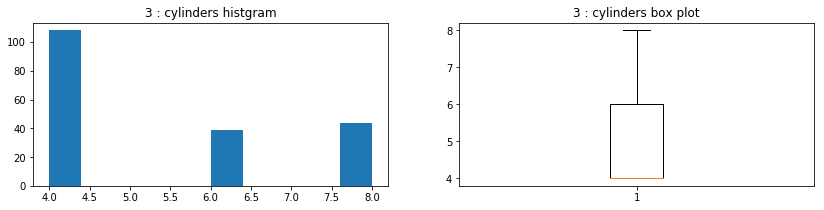

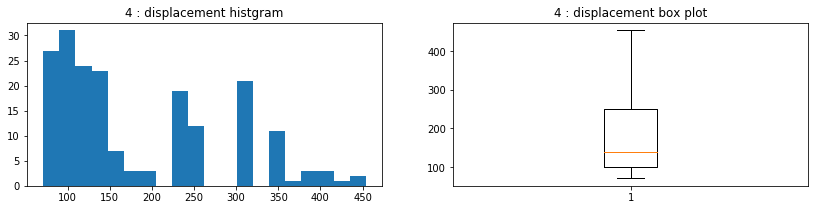

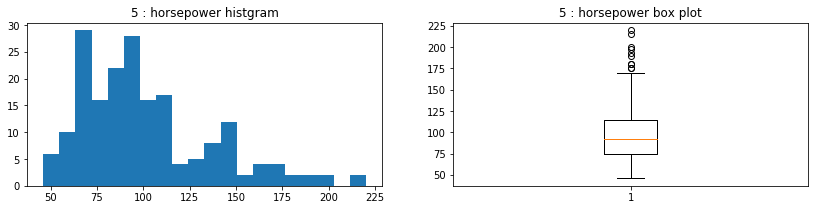

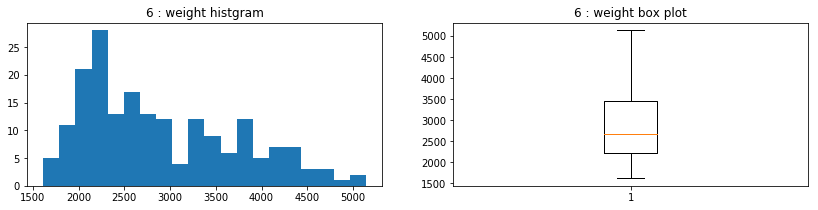

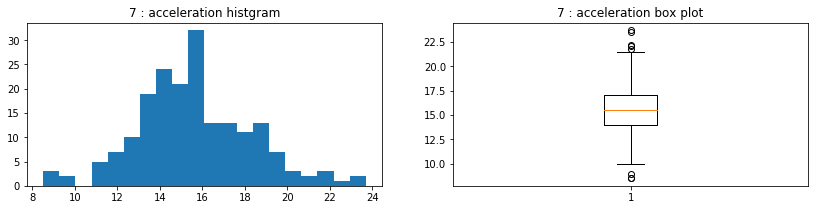

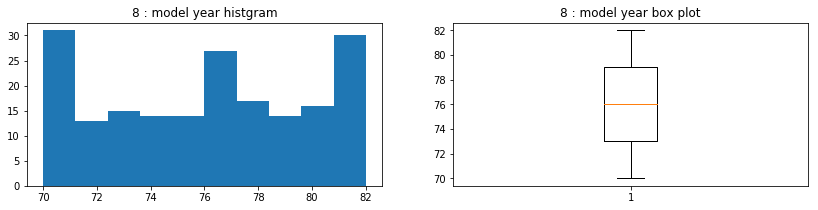

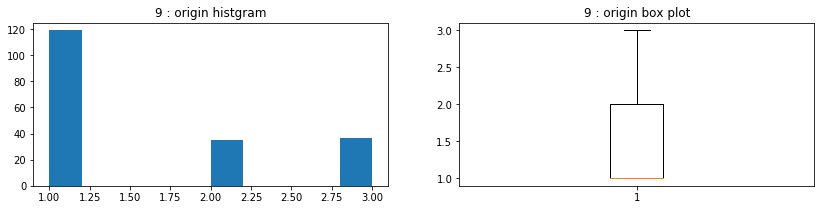

In [58]:
# ヒストグラム&箱ひげ図
df_plot_frec(train)

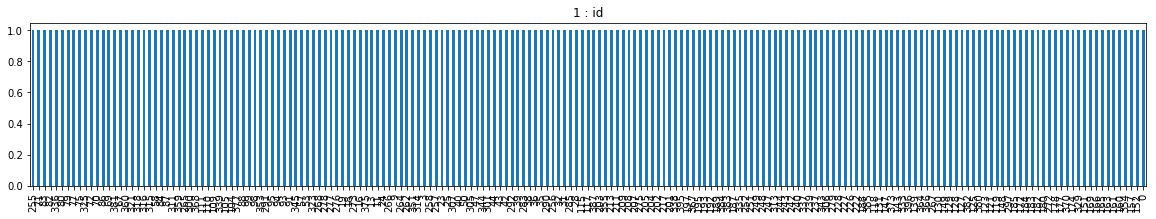

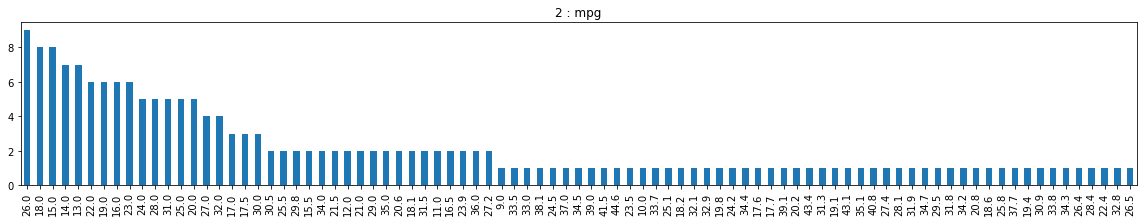

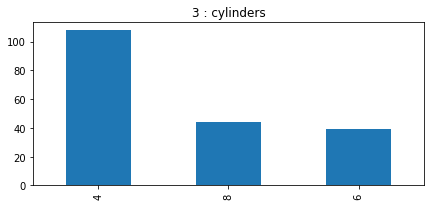

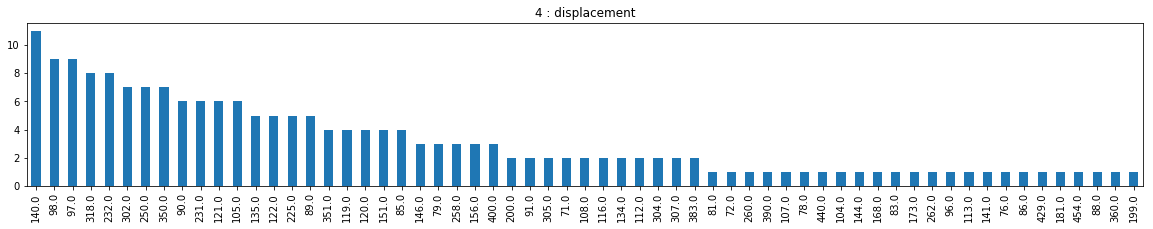

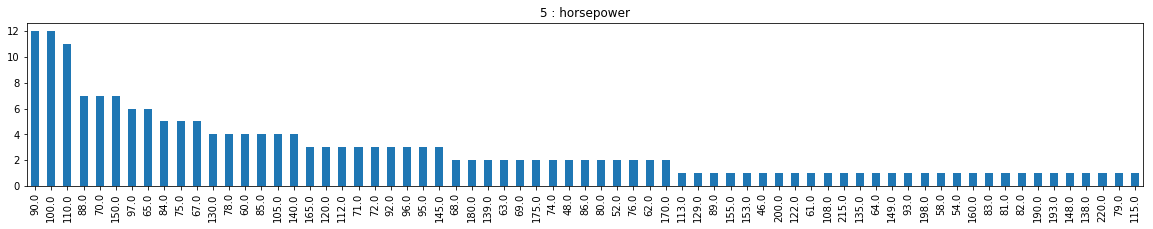

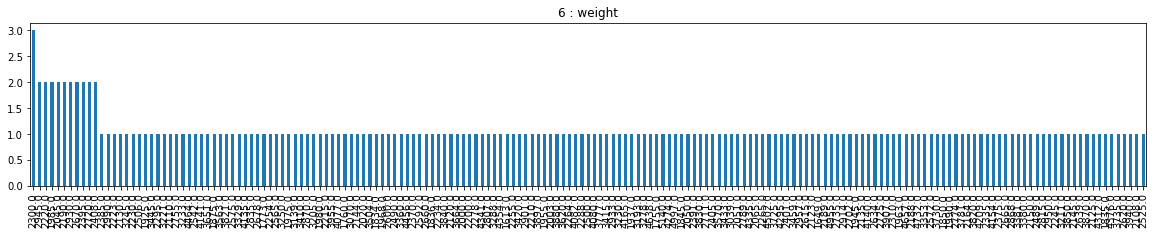

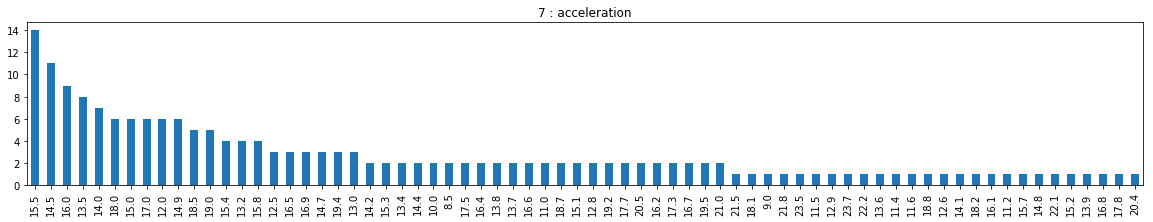

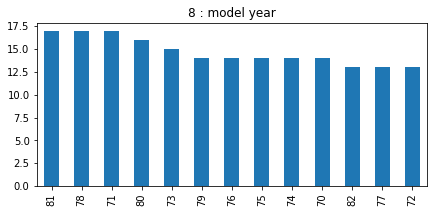

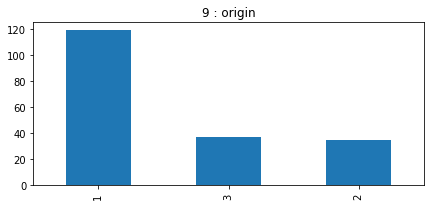

In [59]:
# 頻度ランキング
df_plot_frec_bar(train, val_rank=True)

In [60]:
# 値昇順にしたときの頻度の並び
# df_plot_frec_bar(train, sort_index=True)

### 相関

In [61]:
# 各列の特徴量
train.corr()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
id,1.000000,-0.051908,0.127175,0.123984,0.089825,0.089775,-0.099379,-0.071494,-0.040852
mpg,-0.051908,1.000000,-0.800358,-0.828812,-0.802550,-0.839351,0.387247,0.558330,0.550458
cylinders,0.127175,-0.800358,1.000000,0.952123,0.861064,0.898706,-0.485949,-0.308900,-0.505464
displacement,0.123984,-0.828812,0.952123,1.000000,0.905339,0.936996,-0.535819,-0.336959,-0.583657
horsepower,0.089825,-0.802550,0.861064,0.905339,1.000000,0.877775,-0.657920,-0.387261,-0.441385
weight,0.089775,-0.839351,0.898706,0.936996,0.877775,1.000000,-0.409116,-0.274513,-0.548446
acceleration,-0.099379,0.387247,-0.485949,-0.535819,-0.657920,-0.409116,1.000000,0.193398,0.228686
model year,-0.071494,0.558330,-0.308900,-0.336959,-0.387261,-0.274513,0.193398,1.000000,0.116379
origin,-0.040852,0.550458,-0.505464,-0.583657,-0.441385,-0.548446,0.228686,0.116379,1.000000


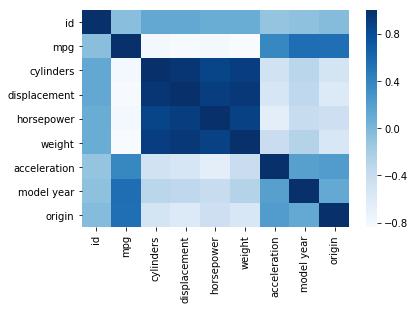

In [62]:
# 特徴量をヒートマップで可視化
sns.heatmap(train.corr(), cmap='Blues')

In [63]:
# 目的変数 mpg の相関係数列挙
train.corr().mpg.abs().sort_values(ascending=False)

mpg             1.000000
weight          0.839351
displacement    0.828812
horsepower      0.802550
cylinders       0.800358
model year      0.558330
origin          0.550458
acceleration    0.387247
id              0.051908
Name: mpg, dtype: float64

強い相関

- 重量
- 排気量
- 馬力
- シリンダ数

mpg(燃費)との因果関係がある項目として、
感覚的に重量は間違いない。
排気量、馬力、シリンダ数もエンジンのパフォーマンスに影響するのでたぶん関はあるがよく分からない。
この辺は基礎集計を通して紐解いていきたい。

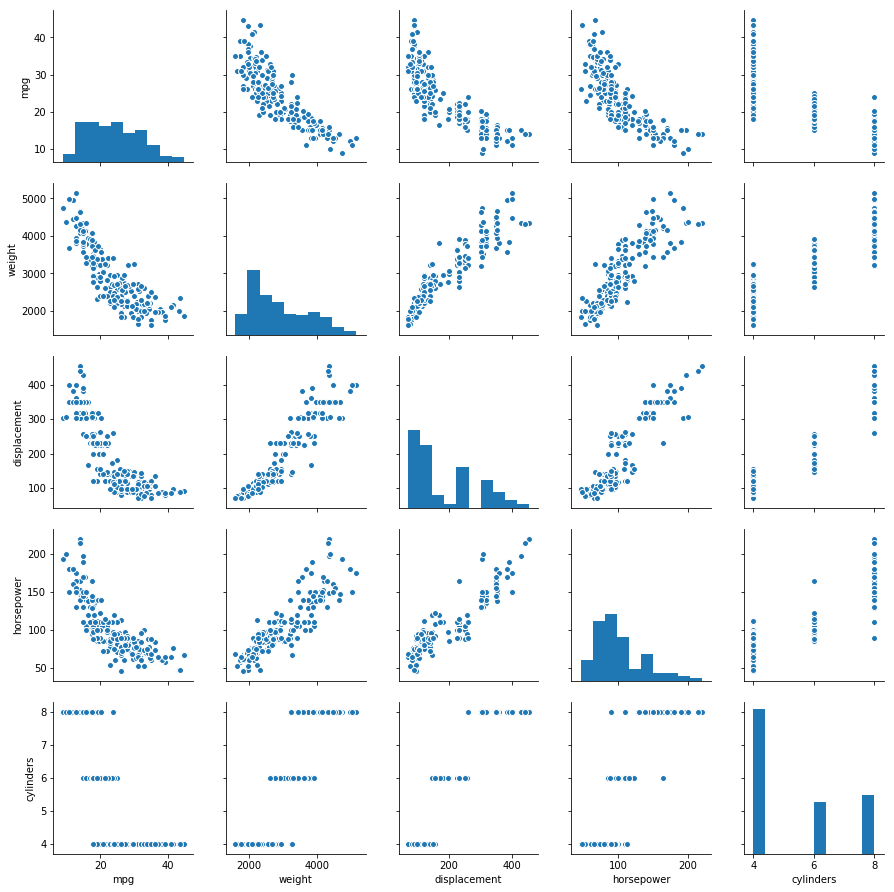

In [64]:
# 目的変数と強い相関を持つ変数の分布
sns.pairplot(train.loc[:, ["mpg", "weight", "displacement", "horsepower", "cylinders"]])

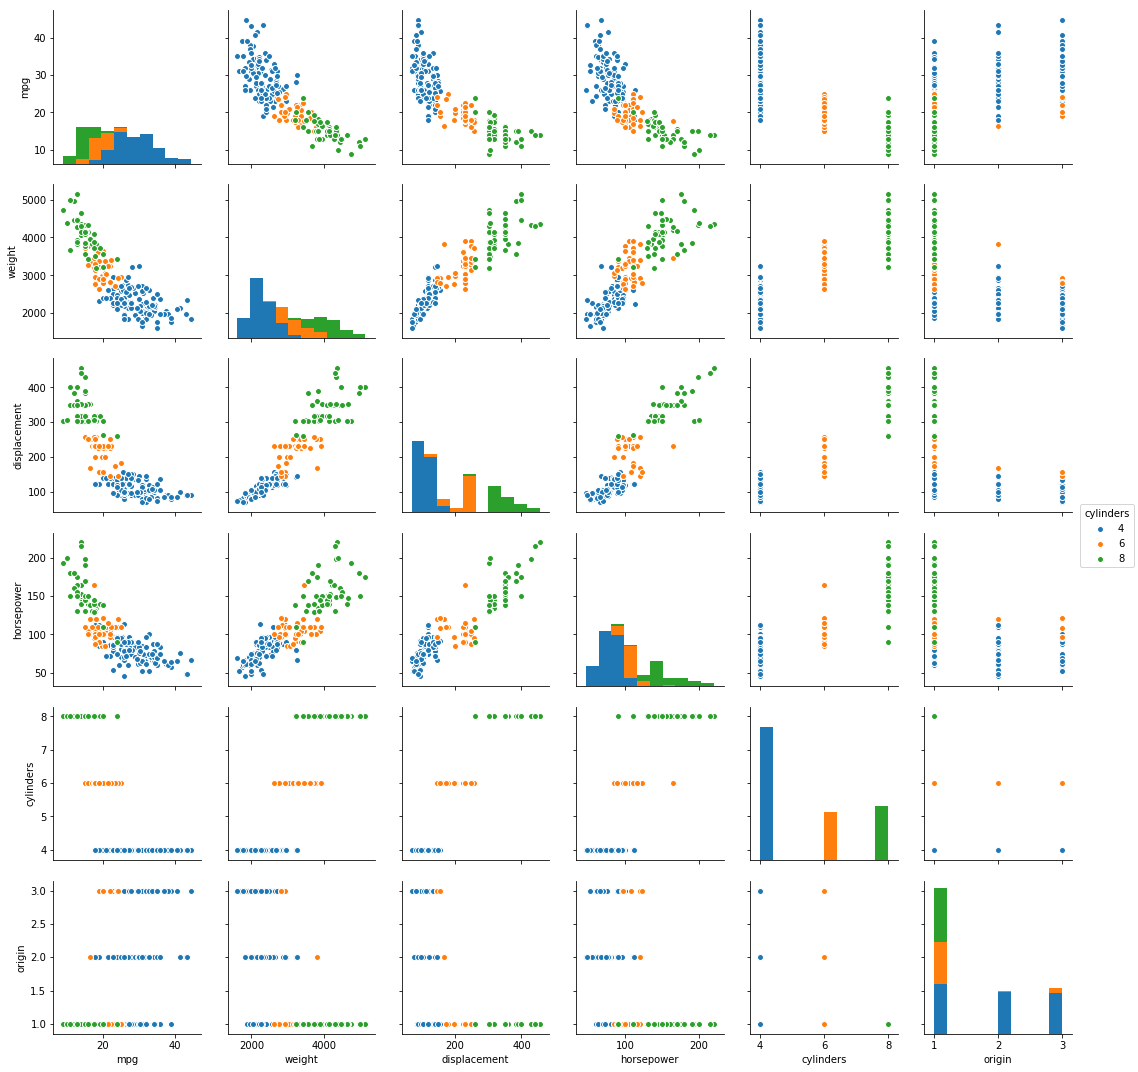

In [65]:
# 目的変数と強い相関を持つ変数の分布 シリンダ数で色分け
sns.pairplot(train.loc[:, ["mpg", "weight", "displacement", "horsepower", "cylinders", "origin"]], hue="cylinders")

mpg 行の分布から、きれいに分布が分かれているように見える。
シリンダ数が違う中でそれぞれ傾向が見える可能性がある。

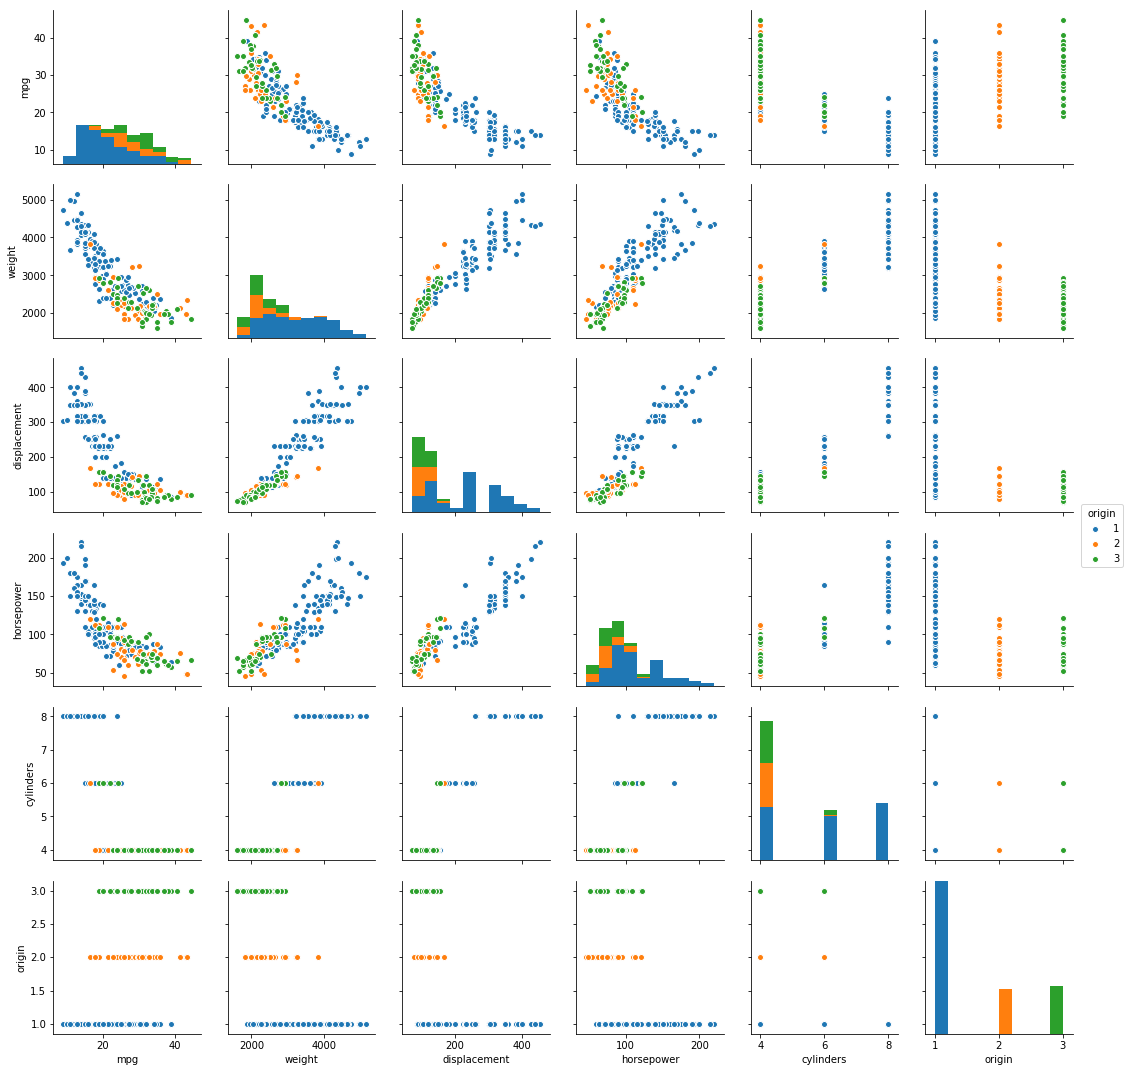

In [66]:
# 目的変数と強い相関を持つ変数の分布 起源数で色分け
sns.pairplot(train.loc[:, ["mpg", "weight", "displacement", "horsepower", "cylinders", "origin"]], hue="origin")

シリンダ数の時と違って、mpg行の分布がきれいに色別れしない。
起源別の傾向は現れなかったと判断。

### 時系列

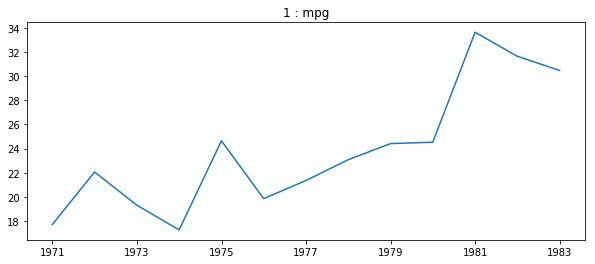

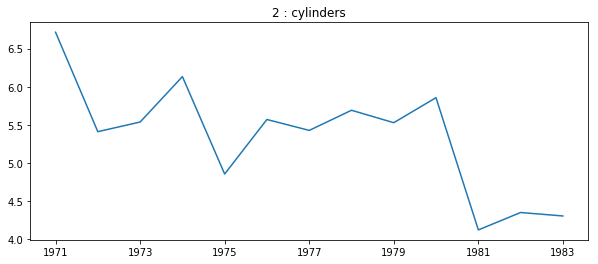

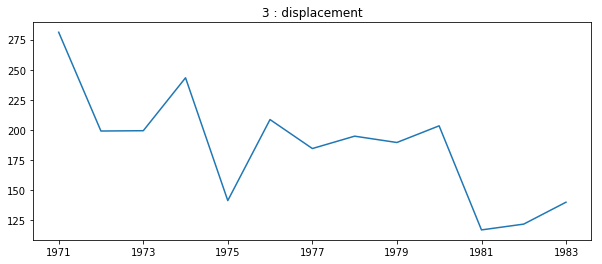

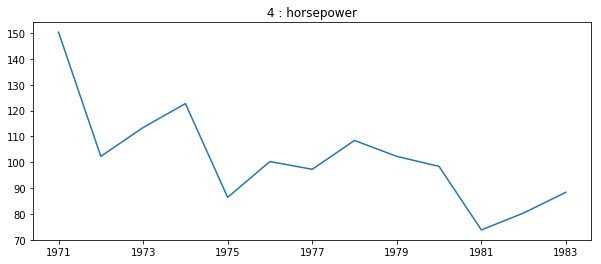

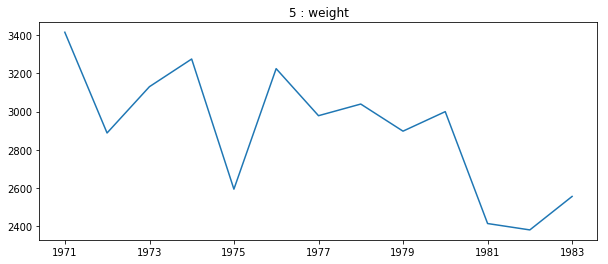

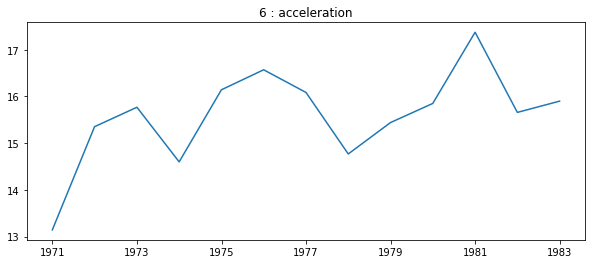

In [67]:
# モデルイヤー別、各変数の平均値
df_plot_time(grouped)

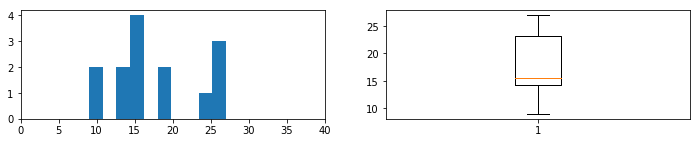

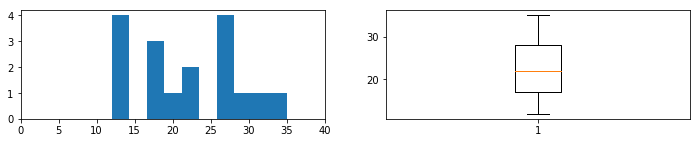

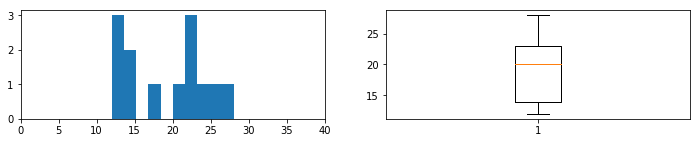

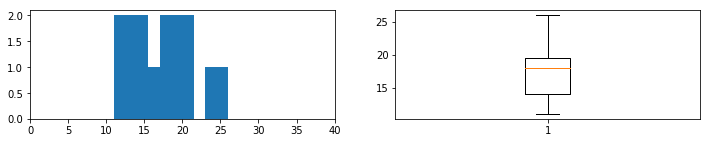

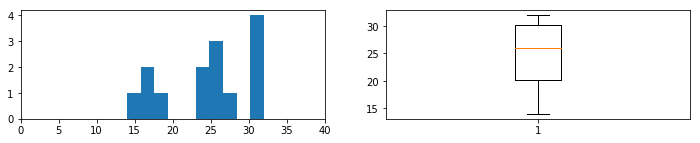

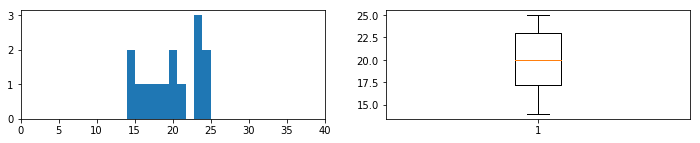

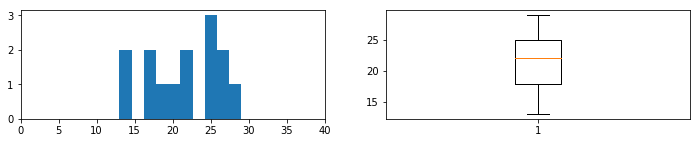

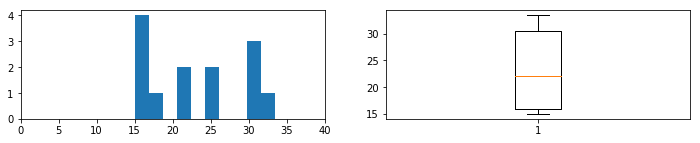

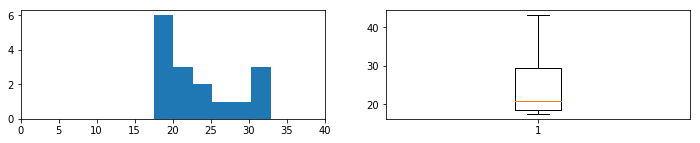

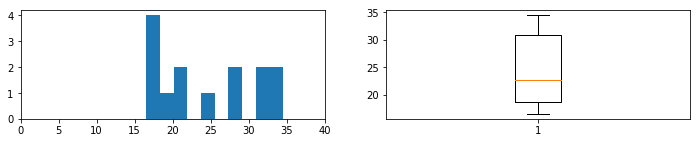

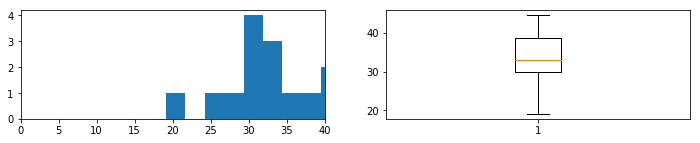

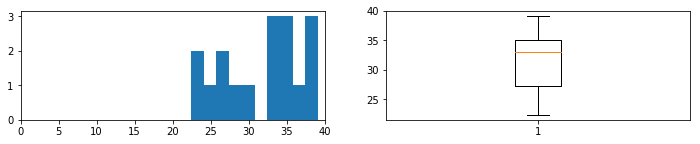

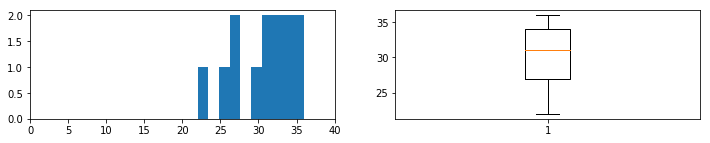

In [68]:
# モデルイヤー別のmpgヒストグラム
for x in train_t.drop(columns=["id", "origin"]).groupby(pd.Grouper(key='model year', freq='Y')):
    #print(x[1].mpg)

    fig = plt.figure(figsize=(12,2))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.set_xlim([0, 40])
    if len(x[1]) > 20:
        ax1.hist(x[1].mpg, bins=20)
        ax2.boxplot(x[1].mpg)
    else:
        ax1.hist(x[1].mpg)
        ax2.boxplot(x[1].mpg)

## 追加調査：メーカー

In [69]:
maker_list = ["honda", "toyota", "subaru", "mazda", "suzuki", "volkswagen"]

In [70]:
def count_makers(df):
    n_sum=0
    for x in maker_list:
        n = len( df.loc[df.loc[:, 'car name'].str.contains(x), :])
        n_sum += n
        print(x + " :" + str(n))

    print("[sum]" + str(n_sum))

In [71]:
count_makers(train)

honda :6
toyota :13
subaru :2
mazda :2
suzuki :0
volkswagen :10
[sum]33


In [72]:
 train.loc[train.loc[:, 'car name'].str.contains("honda"), :]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
30,67,31.5,4,98.0,68.0,2045.0,18.5,77,3,honda accord cvcc
48,95,35.1,4,81.0,60.0,1760.0,16.1,81,3,honda civic 1300
49,98,44.6,4,91.0,67.0,1850.0,13.8,80,3,honda civic 1500 gl
96,195,24.0,4,120.0,97.0,2489.0,15.0,74,3,honda civic
169,338,29.5,4,98.0,68.0,2135.0,16.6,78,3,honda accord lx
173,344,33.7,4,107.0,75.0,2210.0,14.4,81,3,honda prelude


In [73]:
 train.loc[train.loc[:, 'car name'].str.contains("toyota"), :]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel
33,71,39.1,4,79.0,58.0,1755.0,16.9,81,3,toyota starlet
35,75,32.0,4,71.0,65.0,1836.0,21.0,74,3,toyota corolla 1200
59,119,34.0,4,108.0,70.0,2245.0,16.9,82,3,toyota corolla
62,125,38.1,4,89.0,60.0,1968.0,18.8,80,3,toyota corolla tercel
105,209,31.0,4,76.0,52.0,1649.0,16.5,74,3,toyota corona
136,272,20.0,6,156.0,122.0,2807.0,13.5,73,3,toyota mark ii
142,279,24.0,4,134.0,96.0,2702.0,13.5,75,3,toyota corona
155,311,31.0,4,71.0,65.0,1773.0,19.0,71,3,toyota corolla 1200


In [74]:
 train.loc[train.loc[:, 'car name'].str.contains(""), :]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel
5,16,27.0,4,151.0,90.0,2735.0,18.0,82,1,pontiac phoenix
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevroelt chevelle malibu
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw 2002
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge st. regis


In [75]:
 train.loc[train.loc[:, 'car name'].str.contains("subaru"), :]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
22,44,26.0,4,108.0,93.0,2391.0,15.5,74,3,subaru
37,79,33.8,4,97.0,67.0,2145.0,18.0,80,3,subaru dl


In [76]:
 train.loc[train.loc[:, 'car name'].str.contains("mazda"), :]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,80,31.3,4,120.0,75.0,2542.0,17.5,80,3,mazda 626
172,343,32.8,4,78.0,52.0,1985.0,19.4,78,3,mazda glc deluxe


In [77]:
 train.loc[train.loc[:, 'car name'].str.contains("suzuki"), :]

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


## 追加調査：高mpg の傾向

In [78]:
# 実際よく予想をはずした 30以上から見ていく
train_30 = train.loc[train['mpg']>=30, :]

In [79]:
# 全体の25%
len(train_30), len(train_30)/len(train)*100

(49, 25.654450261780106)

In [80]:
train_30['car name']

1                     vw rabbit custom
4                        toyota tercel
11                          dodge omni
16                  chevrolet chevette
27                   dodge charger 2.2
30                   honda accord cvcc
32                 volkswagen scirocco
33                      toyota starlet
35                 toyota corolla 1200
37                           subaru dl
38                           mazda 626
40     volkswagen rabbit custom diesel
48                    honda civic 1300
49                 honda civic 1500 gl
52                          chevy s-10
53          pontiac j2000 se hatchback
57                           fiat 124b
59                      toyota corolla
62               toyota corolla tercel
65                           audi 4000
72                        datsun 200sx
73                    plymouth reliant
85                      plymouth champ
87           chevrolet cavalier 2-door
89                          datsun 210
94                      f

In [81]:
# トヨタやるやないか
count_makers(train_30)

honda :4
toyota :8
subaru :1
mazda :2
suzuki :0
volkswagen :5
[sum]20


In [82]:
# シリンダーは4のみ
train_30.cylinders.unique()

array([4], dtype=int64)

In [83]:
# シリンダー＝４のおよそ45％の割合
len(train_30) / (train.cylinders==4).sum() * 100

45.370370370370374

### 頻度

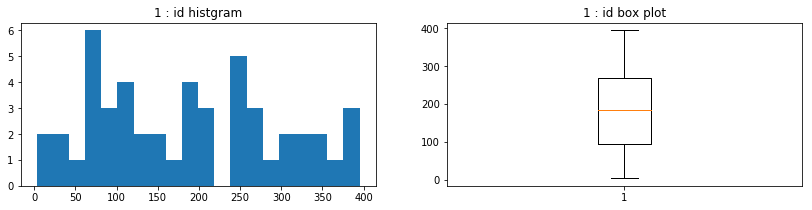

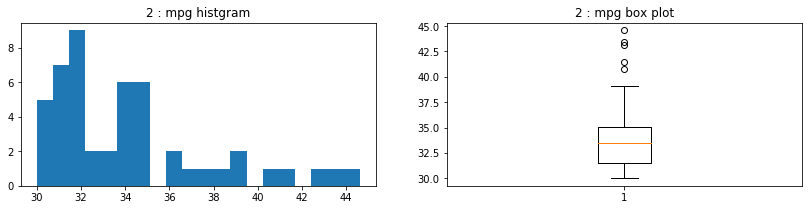

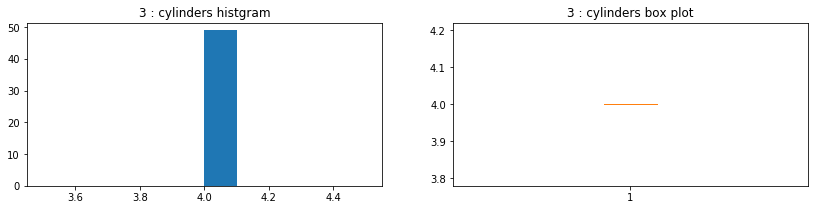

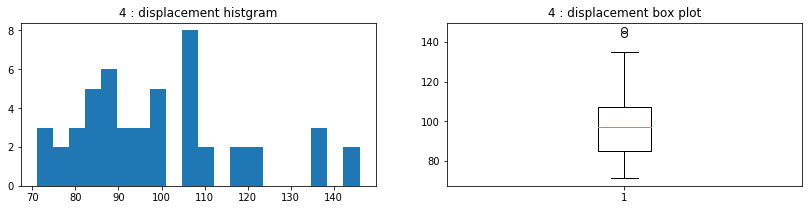

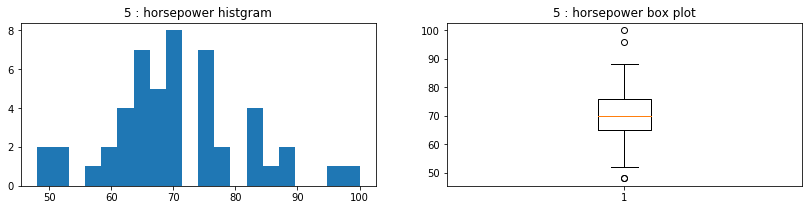

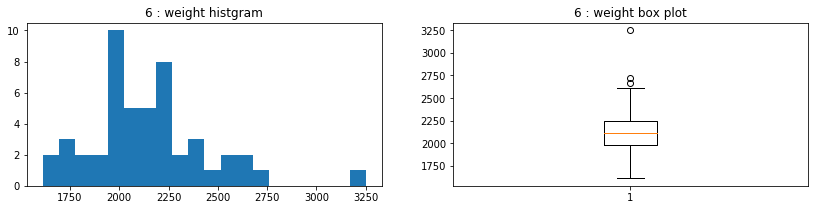

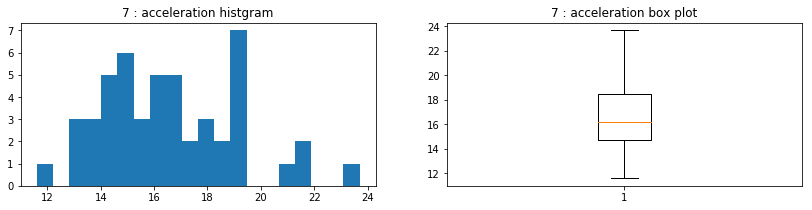

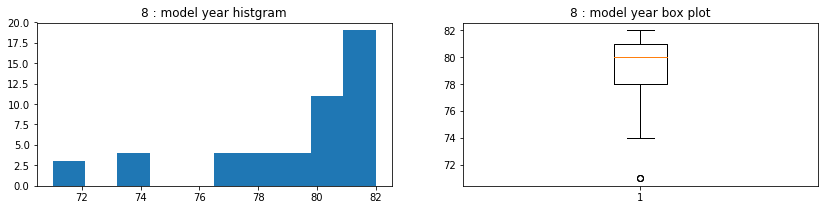

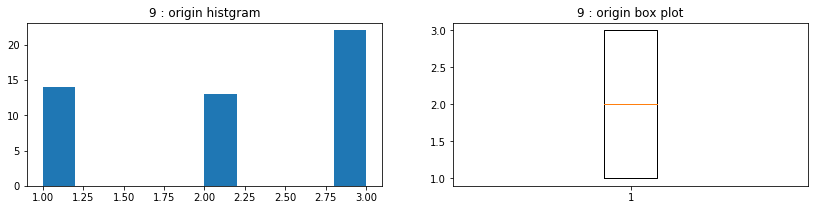

In [84]:
df_plot_frec(train_30)

モデルイヤーが新しい＝mpgが良い（低燃費）

### 相関

In [85]:
train_30.corr()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
id,1.000000,0.084430,NaN,-0.001457,-0.063853,0.024284,0.102894,-0.137607,0.066104
mpg,0.084430,1.000000,NaN,-0.239138,-0.368613,-0.258506,0.212615,0.283966,0.149514
cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
displacement,-0.001457,-0.239138,NaN,1.000000,0.690195,0.862504,-0.368794,0.590478,-0.427427
horsepower,-0.063853,-0.368613,NaN,0.690195,1.000000,0.574261,-0.578771,0.316950,-0.272178
weight,0.024284,-0.258506,NaN,0.862504,0.574261,1.000000,-0.017652,0.484767,-0.327971
acceleration,0.102894,0.212615,NaN,-0.368794,-0.578771,-0.017652,1.000000,-0.215054,0.360107
model year,-0.137607,0.283966,NaN,0.590478,0.316950,0.484767,-0.215054,1.000000,-0.276828
origin,0.066104,0.149514,NaN,-0.427427,-0.272178,-0.327971,0.360107,-0.276828,1.000000


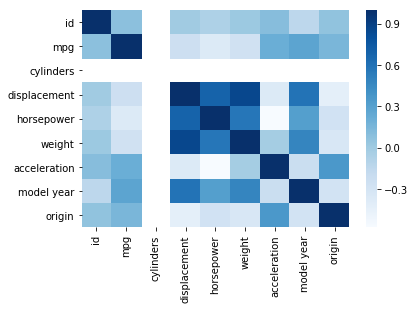

In [86]:
# 特徴量をヒートマップで可視化
sns.heatmap(train_30.corr(), cmap='Blues')

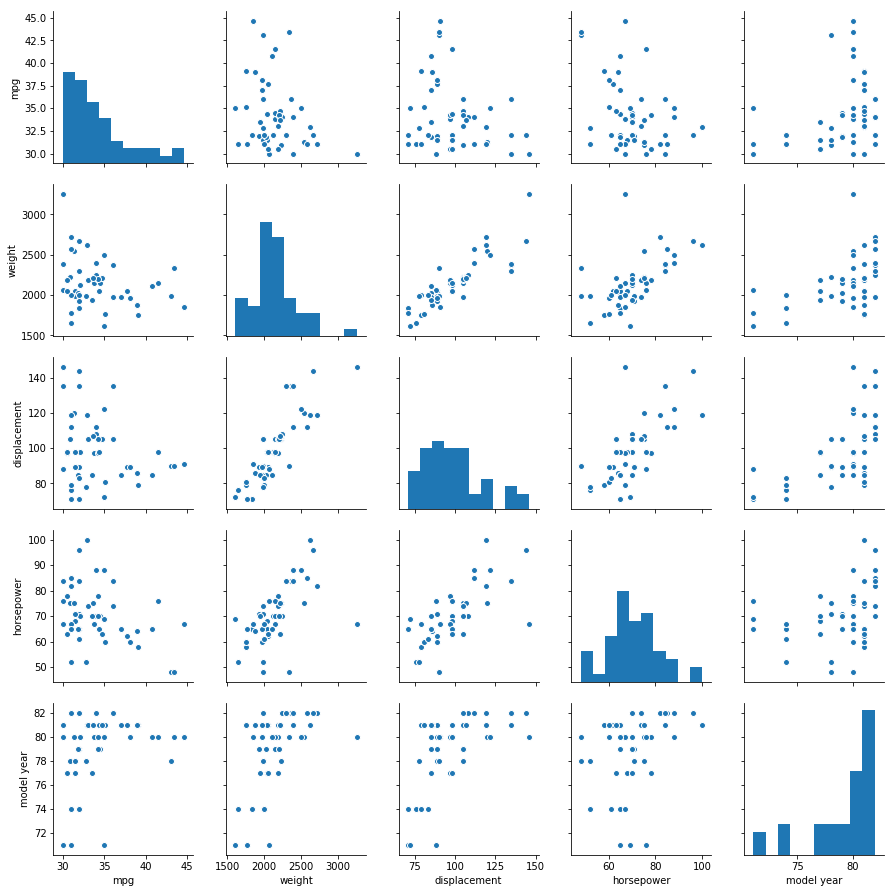

In [87]:
# 目的変数と強い相関を持つ変数の分布
sns.pairplot(train_30.loc[:, ["mpg", "weight", "displacement", "horsepower", "model year"]])

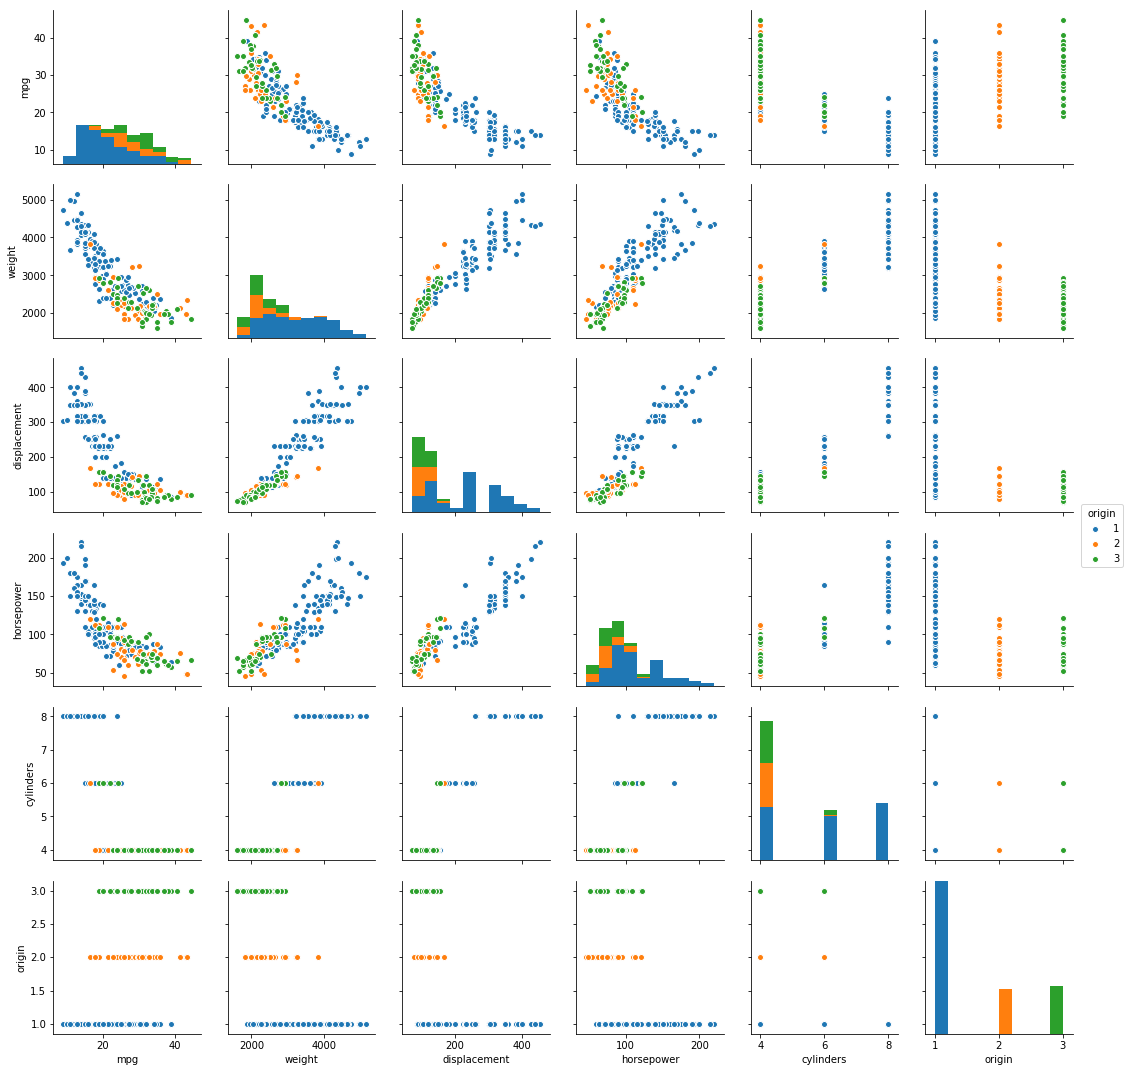

In [88]:
# 目的変数と強い相関を持つ変数の分布 世代数で色分け
sns.pairplot(train.loc[:, ["mpg", "weight", "displacement", "horsepower", "cylinders", "origin"]], hue="origin")

# 仮説

- シリンダー数の違いによって分布の傾向が出やすい傾向にある
  - より傾向を顕著にするよう、突出したデータを削除すれば一般的な予測精度が上がると考えられる

- 年式が後半になるにつれて燃費が向上している
  - 相関は低くても重要

- 起源は現状因果関係を見出せていない
  - 除外が良いかもしれない